
Iris Dataset Sample:
   sepal_length  sepal_width  petal_length  petal_width species
0           4.9          3.0           1.4          0.2  setosa
1           4.7          3.2           1.3          0.2  setosa
2           4.6          3.1           1.5          0.2  setosa
3           5.0          3.6           1.4          0.2  setosa
4           5.4          3.9           1.7          0.4  setosa

Descriptive Statistics:
      Species      Mean  Variance   Std Dev  Min  Max
0      Setosa  1.465306  0.030646  0.175061  1.0  1.9
1  Versicolor  4.263265  0.224872  0.474207  3.0  5.1


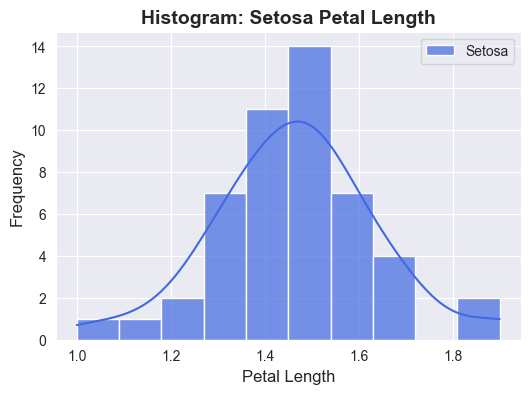

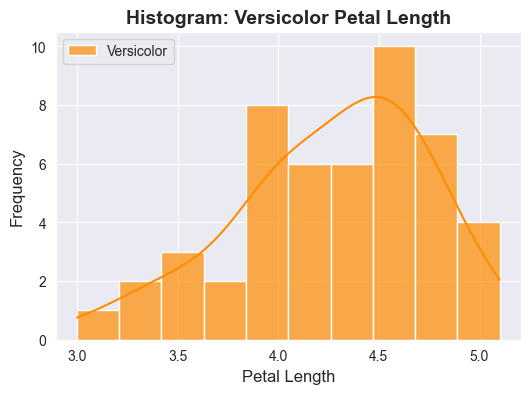

C:\Users\subar\AppData\Local\Temp\ipykernel_3908\553667102.py:70: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[setosa_petal, versicolor_petal], palette=['royalblue', 'darkorange'])


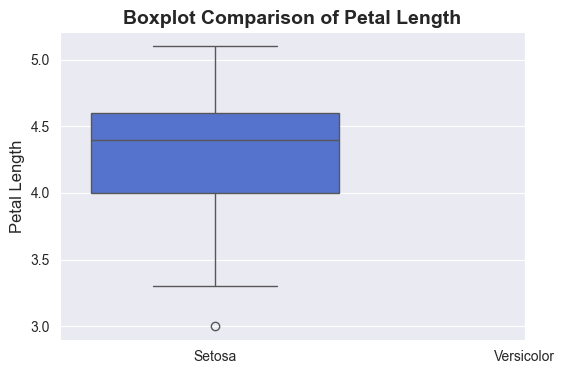

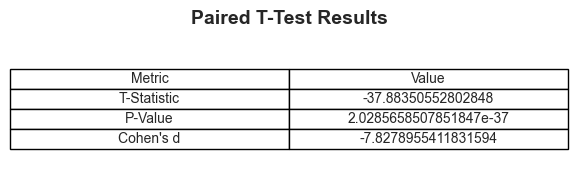


✅ Statistically significant difference found (p < 0.05).


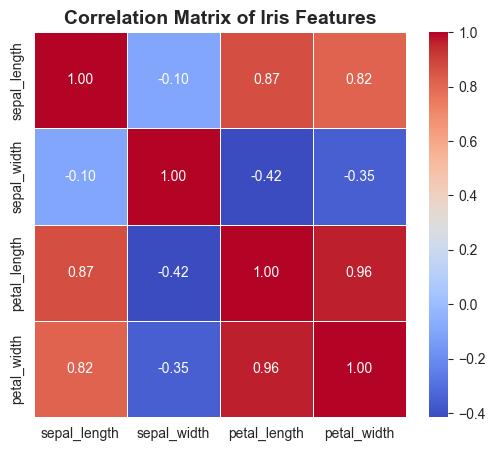

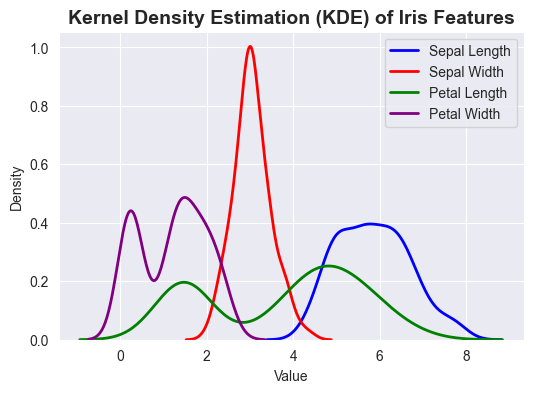


✅ All visualizations displayed. Data saved in CSV format.


In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load dataset from CSV
df = pd.read_csv("iris.csv")  # Ensure iris.csv is in the working directory

# Rename columns for clarity (match dataset format)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Convert species names to lowercase and remove "Iris-" prefix
df['species'] = df['species'].str.lower().str.replace("iris-", "")

# Save cleaned dataset to confirm successful loading
df.to_csv("cleaned_iris_dataset.csv", index=False)

# Display the first few rows of the dataset
print("\nIris Dataset Sample:")
print(df.head())

# Filter Setosa and Versicolor species for Paired T-Test
setosa_petal = df[df['species'] == 'setosa']['petal_length']
versicolor_petal = df[df['species'] == 'versicolor']['petal_length']

# Ensure equal sample size for paired t-test
min_len = min(len(setosa_petal), len(versicolor_petal))
setosa_petal = setosa_petal.iloc[:min_len]  # Use iloc to avoid index misalignment
versicolor_petal = versicolor_petal.iloc[:min_len]

# 🔹 Descriptive Statistics
desc_stats = pd.DataFrame({
    'Species': ['Setosa', 'Versicolor'],
    'Mean': [setosa_petal.mean(), versicolor_petal.mean()],
    'Variance': [setosa_petal.var(), versicolor_petal.var()],
    'Std Dev': [setosa_petal.std(), versicolor_petal.std()],
    'Min': [setosa_petal.min(), versicolor_petal.min()],
    'Max': [setosa_petal.max(), versicolor_petal.max()]
})

# Save descriptive statistics to CSV
desc_stats.to_csv("descriptive_statistics.csv", index=False)

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(desc_stats)

# 🔹 Improved Colorful Histograms
sns.set_style("darkgrid")
plt.figure(figsize=(6, 4))
sns.histplot(setosa_petal, bins=10, kde=True, color='royalblue', label='Setosa', alpha=0.7)
plt.title('Histogram: Setosa Petal Length', fontsize=14, fontweight='bold')
plt.xlabel('Petal Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(versicolor_petal, bins=10, kde=True, color='darkorange', label='Versicolor', alpha=0.7)
plt.title('Histogram: Versicolor Petal Length', fontsize=14, fontweight='bold')
plt.xlabel('Petal Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

# 🔹 Boxplot: Petal Length Comparison
plt.figure(figsize=(6, 4))
sns.boxplot(data=[setosa_petal, versicolor_petal], palette=['royalblue', 'darkorange'])
plt.xticks([0, 1], ['Setosa', 'Versicolor'])
plt.title('Boxplot Comparison of Petal Length', fontsize=14, fontweight='bold')
plt.ylabel('Petal Length', fontsize=12)
plt.show()

# 🔹 Paired T-Test
t_stat, p_value = stats.ttest_rel(setosa_petal, versicolor_petal)

# Calculate Effect Size (Cohen's d)
cohen_d = (setosa_petal.mean() - versicolor_petal.mean()) / np.sqrt((setosa_petal.var() + versicolor_petal.var()) / 2)

# Save T-test results to CSV
results = pd.DataFrame({
    'Metric': ['T-Statistic', 'P-Value', 'Cohen\'s d'],
    'Value': [t_stat, p_value, cohen_d]
})
results.to_csv("paired_t_test_results.csv", index=False)

# 🔹 T-Test Results as Table
fig, ax = plt.subplots(figsize=(6, 2))
ax.set_axis_off()
table_data = [["T-Statistic", t_stat], ["P-Value", p_value], ["Cohen's d", cohen_d]]
table = ax.table(cellText=table_data, colLabels=["Metric", "Value"], loc="center", cellLoc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("Paired T-Test Results", fontsize=14, fontweight='bold')
plt.show()

# Interpretation
if p_value < 0.05:
    print("\n✅ Statistically significant difference found (p < 0.05).")
else:
    print("\n❌ No statistically significant difference found (p ≥ 0.05).")

# 🔹 Correlation Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(df.drop(columns=['species']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Iris Features", fontsize=14, fontweight='bold')
plt.show()

# 🔹 Distribution Fit Check: Using KDE Plots
plt.figure(figsize=(6, 4))
sns.kdeplot(df['sepal_length'], color='blue', label="Sepal Length", linewidth=2)
sns.kdeplot(df['sepal_width'], color='red', label="Sepal Width", linewidth=2)
sns.kdeplot(df['petal_length'], color='green', label="Petal Length", linewidth=2)
sns.kdeplot(df['petal_width'], color='purple', label="Petal Width", linewidth=2)
plt.legend()
plt.title("Kernel Density Estimation (KDE) of Iris Features", fontsize=14, fontweight='bold')
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# 🔹 Save Final Summary Table
df.describe().to_csv("iris_summary_statistics.csv")

print("\n✅ All visualizations displayed. Data saved in CSV format.")
